In [7]:
import pandas as pd

# Especifica el tipo de datos manualmente para todas las columnas
dtype_dict = {col: str for col in multiple_choice_responses.columns}

# Carga el conjunto de datos con el tipo de datos especificado
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", dtype=dtype_dict)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

# Muestra las columnas de todas las tablas
print("1. multiple_choice_response: ", multiple_choice_responses.columns)
print("2. other_text_responses: ", other_text_responses.columns)
print("3. questions_only: ", questions_only.columns)
# print("4. survey_schema: ", survey_schema)


1. multiple_choice_response:  Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)
2. other_text_responses:  Index(['Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q14_Part_1_TEXT',
       'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT',
       'Q14_Part_5_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT',
       'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT',
       'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT',
       'Q29_OTHER_TEXT', 'Q2_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT',
       'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q5_OTHER_TEXT',
       'Q9_OTHER_TEXT'],
      dtype='object')
3. questions_onl

In [8]:
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

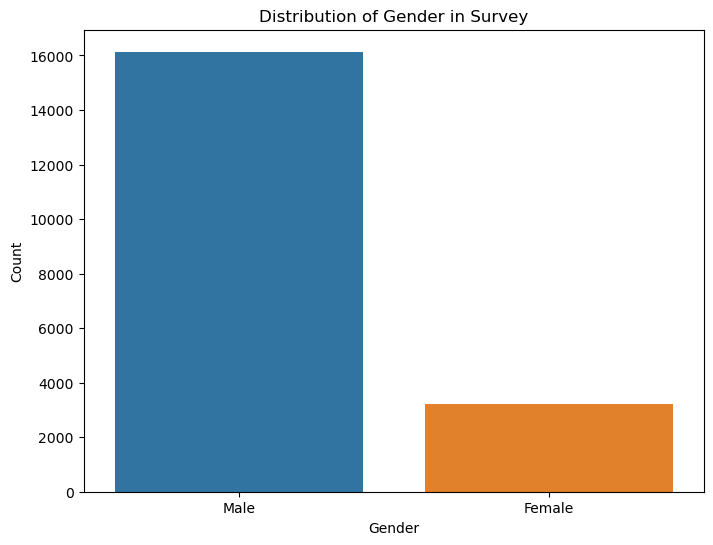

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las filas con género "Female" o "Male"
filtered_demographics = demographics[(demographics['Gender'] == 'Female') | (demographics['Gender'] == 'Male')]

# Contar la cantidad de encuestados por género
gender_counts = filtered_demographics['Gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender in Survey')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Creando el gráfico de barras horizontal
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location')
ax.set(xlabel='Counts')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()

# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = loc.at[i, 'Female'] + loc.at[i, 'Male']
    loc.at[i, 'Female'] = round(female / total * 100, 2)  # Calculando el porcentaje y redondeando a 2 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Creando el gráfico de barras horizontal para el porcentaje de mujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location (Percentage)')
ax.set(xlabel='Percentage')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()
